<a href="https://colab.research.google.com/github/danfibo/fibonacci/blob/master/Hamoye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv?raw=True'
fuel_data = pd.read_csv(url, error_bad_lines=False)

In [ ]:
fuel_data.tail()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.03
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.95
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.99
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.11
29522,f1_fuel_2018_12_12_1_14,12,2018,wygen 3 bhp 52%,gas,mcf,17853.0,1.059,0.00,0.00,11.68


In [ ]:
summary = fuel_data.describe(include='all').T

In [ ]:
summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
record_id,29523,29523,f1_fuel_2012_12_7_5_4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
utility_id_ferc1,29523,NaN,NaN,NaN,118.602,74.1784,1,55,122,176,514
report_year,29523,NaN,NaN,NaN,2005.81,7.02548,1994,2000,2006,2012,2018
plant_name_ferc1,29523,2315,big stone,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_type_code_pudl,29523,6,gas,11486,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_unit,29343,9,mcf,11354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_qty_burned,29523,NaN,NaN,NaN,2.62212e+06,9.118e+06,1,13817,253322,1.42403e+06,5.55894e+08
fuel_mmbtu_per_unit,29523,NaN,NaN,NaN,8.49211,10.6002,1e-06,1.024,5.76269,17.006,341.26
fuel_cost_per_unit_burned,29523,NaN,NaN,NaN,208.649,2854.49,-276.08,5.207,26,47.113,139358
fuel_cost_per_unit_delivered,29523,NaN,NaN,NaN,917.57,68775.9,-874.937,3.7785,17.371,42.137,7.96452e+06


In [ ]:
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [ ]:
fuel_data.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [ ]:
fuel_data['fuel_unit'] = fuel_data['fuel_unit'].fillna(value='mcf')

In [ ]:
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [ ]:
count_of_diff_fuel_units = pd.DataFrame(fuel_data.groupby(['fuel_type_code_pudl', 'fuel_unit'])['fuel_unit'].count())
count_of_diff_fuel_units

fuel_unit
fuel_type_code_pudl fuel_unit           
coal                bbl                1
                    mcf               56
                    mmbtu             52
                    ton             8438
gas                 bbl                2
                    mcf            11386
                    mmbtu             94
                    ton                4
nuclear             gramsU           464
                    kgU              110
                    mcf               15
                    mmbtu             34
                    mwdth             95
                    mwhth            100
oil                 bbl             7952
                    gal               81
                    mcf               28
                    ton                3
other               bbl               42
                    gal                3
                    mcf               45
                    ton               77
waste               bbl                1
                    mcf                4
                    ton              436

In [ ]:
total_fuel_burned = pd.DataFrame(fuel_data.groupby(['fuel_type_code_pudl', 'fuel_unit'])['fuel_qty_burned'].sum())
total_fuel_burned

fuel_qty_burned
fuel_type_code_pudl fuel_unit                 
coal                bbl           1.290598e+06
                    mcf           1.340297e+08
                    mmbtu         1.253987e+09
                    ton           1.487968e+10
gas                 bbl           1.089988e+07
                    mcf           5.547299e+10
                    mmbtu         1.399548e+08
                    ton           4.950557e+06
nuclear             gramsU        3.695163e+08
                    kgU           2.482233e+07
                    mcf           4.830908e+07
                    mmbtu         1.062570e+09
                    mwdth         6.436056e+07
                    mwhth         2.892479e+09
oil                 bbl           4.663699e+08
                    gal           2.897416e+07
                    mcf           1.361902e+07
                    ton           1.056800e+04
other               bbl           1.202228e+07
                    gal           1.388000e+03
                    mcf           4.796773e+08
                    ton           6.378360e+05
waste               bbl           9.110000e+03
                    mcf           5.289300e+04
                    ton           5.161939e+07

In [ ]:
most_common_plant_name = fuel_data.groupby('plant_name_ferc1')['plant_name_ferc1'].count().sort_values()
(most_common_plant_name.idxmax(), most_common_plant_name[most_common_plant_name.idxmax()])

('big stone', 156)

In [ ]:
#fuel_data.groupby('fuel_unit')['fuel_type_code_pudl'].count().max()

In [ ]:
plant_name = (fuel_data.groupby(['plant_name_ferc1', 'fuel_unit'])['fuel_qty_burned'].sum()).sort_values()
most_used_plant = (plant_name.idxmax(), plant_name[plant_name.idxmax()])
most_used_plant

(('sabine', 'mcf'), 1527381456.0)

In [ ]:
plant_name.tail(10)

plant_name_ferc1      fuel_unit
manatee               mcf          8.013734e+08
arkansas nuclear one  mwhth        8.935443e+08
ft. myers             mcf          1.036837e+09
lauderdale            mcf          1.043543e+09
martin                mcf          1.120826e+09
west county           mcf          1.120884e+09
hines energy complex  mcf          1.133614e+09
ninemile point        mcf          1.289418e+09
sanford               mcf          1.293243e+09
sabine                mcf          1.527381e+09
Name: fuel_qty_burned, dtype: float64

In [ ]:
fuel_delivered_per_year = pd.DataFrame(fuel_data.groupby(['report_year', 'fuel_type_code_pudl'])['fuel_cost_per_unit_delivered'].sum())
fuel_delivered_per_year

fuel_cost_per_unit_delivered
report_year fuel_type_code_pudl                              
1994        coal                                    59215.371
            gas                                      8099.070
            nuclear                                  3483.492
            oil                                      7622.838
            other                                     117.148
...                                                       ...
2018        coal                                   254052.695
            gas                                      3851.904
            nuclear                                  8278.485
            oil                                    208107.905
            waste                                     514.749

[148 rows x 1 columns]

In [ ]:
fuel_data.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [ ]:
#fuel_data.groupby('plant_name_ferc1').first()

split the data into two groups and apply some merging methods

In [ ]:
fuel_df1 = fuel_data.iloc[0:19000].reset_index(drop=True)
fuel_df2 = fuel_data.iloc[19000:].reset_index(drop=True)

In [ ]:
fuel_df2.shape

(10523, 11)

In [ ]:
assert len(fuel_data) == (len(fuel_df1) + len(fuel_df2))

**An inner merge will lose rows that do not match in both dataframes**

In [ ]:
pd.merge(fuel_df1, fuel_df2, how="inner").shape

(0, 11)

**An outer merge will return all rows in both dataframes**

In [ ]:
pd.merge(fuel_df1, fuel_df2, how="outer").head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


**A left merge removes rows from the right dataframe that do not have a match with the left and keeps all the rows from the left**

In [ ]:
pd.merge(fuel_df1, fuel_df2, how="left").shape

(19000, 11)

**A right merge removes rows from the left datafr,e that do not have a match with the right and keeps all the rows from the right**

In [ ]:
pd.merge(fuel_df1, fuel_df2, how="right").shape

(10523, 11)

**Checking for duplicates**

In [ ]:
fuel_data.duplicated().any()

False

**Concatenation**

In [ ]:
pd.concat([fuel_df1, fuel_df2]).reset_index(drop=True)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


**Data Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 0, 'Fuel Unit')

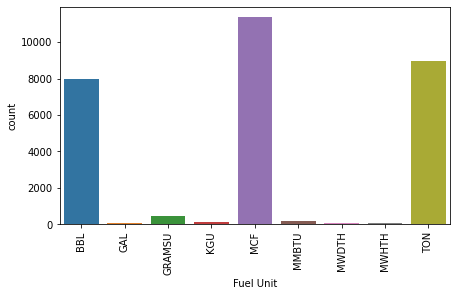

In [ ]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=90)
fuel_unit = pd.DataFrame({'unit':['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU', 'MWDTH', 'MWHTH', 'TON'], 
                          'count':[7998, 84, 464, 110, 11354, 180, 95, 100, 8958]})
sns.barplot(data=fuel_unit, x='unit', y='count')
plt.xlabel('Fuel Unit')

**Plot the barchart by taking the logarithm of the y-axis because of the extreme range of values for the fuel unit**

Text(0.5, 0, 'Fuel Unit')

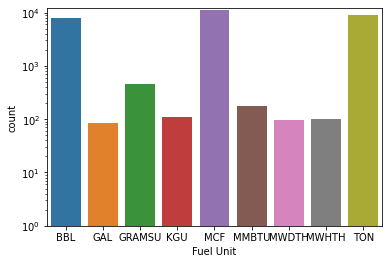

In [ ]:
g = sns.barplot(data=fuel_unit, x='unit', y='count')
g.set_yscale("log")
g.set_ylim(1, 12000)
plt.xlabel('Fuel Unit')

**Ploting a sample from the dataset**

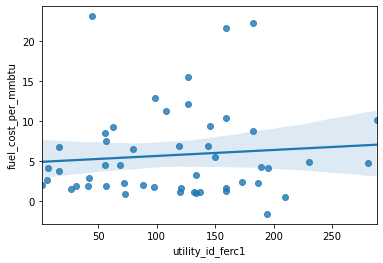

In [ ]:
sample_df = fuel_data.sample(n=50, random_state=4)
sns.regplot(x=sample_df["utility_id_ferc1"], y=sample_df["fuel_cost_per_mmbtu"], fit_reg=True)